# Assignment 2 code

*Group 11*

Importstatements

In [32]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

Loading and preprocessing the data from the MNIST dataset

In [33]:
# load the dataset using the builtin Keras method
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# derive a validation set from the training set
# the original training set is split into 
# new training set (90%) and a validation set (10%)
X_train, X_val = train_test_split(X_train, test_size=0.10, random_state=101)
y_train, y_val = train_test_split(y_train, test_size=0.10, random_state=101)



# the shape of the data matrix is NxHxW, where
# N is the number of images,
# H and W are the height and width of the images
# keras expect the data to have shape NxHxWxC, where
# C is the channel dimension
X_train = np.reshape(X_train, (-1,28,28,1)) 
X_val = np.reshape(X_val, (-1,28,28,1))
X_test = np.reshape(X_test, (-1,28,28,1))


# convert the datatype to float32
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')


# normalize our data values to the range [0,1]
X_train /= 255
X_val /= 255
X_test /= 255

Functions to transform the categories of the dataset and visualize them

In [34]:
def plt_classes(y, labels, num_class=10):
    plt.figure()
    plt.hist(y, bins=range(0,num_class+1), align='left', rwidth=0.9)
    plt.xlabel('Class')
    plt.ylabel('Class count')
    plt.xticks(list(labels.keys()), list(labels.values()))
    plt.title('Class distribution')


def transform_categories(array):
    categories = {
        1: 0,  # vertical digits
        7: 0,  # vertical digits
        0: 1,  # loopy digits
        6: 1,  # loopy digits
        8: 1,  # loopy digits
        9: 1,  # loopy digits
        2: 2,  # curly digits
        5: 2,  # curly digits
        3: 3,  # other
        4: 3   # other
    }
    # Create a NumPy array with category integers corresponding to the values in 'array'
    categorized_array = np.vectorize(categories.get)(array)
    return categorized_array


def process_categories(y_train, y_val, y_test, group_classes=False):
    """This function processes the catories based on the groupment of the classes."""
    # define labels for plots 
    labels = {0:0,
              1:1,
              2:2,
              3:3,
              4:4,
              5:5,
              6:6,
              7:7,
              8:8,
              9:9}
    
    if group_classes == True:
        y_train = transform_categories(y_train)
        y_val = transform_categories(y_val)
        y_test = transform_categories(y_test)
        labels = {
            0: 'vertical',
            1: 'loopy',
            2: 'curly',
            3: 'other'}
    
    # define number of categories
    num_classes = max(y_train)+1

    # display distribution of classes
    plt_classes(y_train, labels, num_classes)
    plt.show()

    # convert 1D class arrays to 10D class matrices
    y_train = to_categorical(y_train, num_classes)
    y_val = to_categorical(y_val, num_classes)
    y_test = to_categorical(y_test, num_classes)
    return num_classes, y_train, y_val, y_test, labels


Functions for making and evaluating the models

In [35]:
def model_layers(model, nr_neurons=64, nr_layers=3, activation_type=None, num_classes=10):
    """This function determines the characteristics of the neural network.
    Depending on the parameter of activation_type, the neural network uses a
    different activation function. Function returns the model which has to be processed further.
    args:
        model: Sequential model per experiment
        nr_neurons (int): number of neurons per hidden layer
        nr_layers (int): number of hidden layers per model, if 0 there are no hidden layers
        activation_type (str): type of activation function, if None there are no hidden layers
        num_classes (int): number of categories used in the model and neurons in the output layer
    returns:
        model: Sequential model with added layers"""
    # flatten the 28x28x1 pixel input images to a row of pixels (a 1D-array)
    model.add(Flatten(input_shape=(28,28,1))) 
    if activation_type != None and nr_layers > 0:
        for i in range(nr_layers):
            # fully connected layer 
            model.add(Dense(nr_neurons, activation=activation_type))
    # output layer with 10 nodes (one for each class) and softmax nonlinearity
    model.add(Dense(num_classes, activation='softmax')) 
    return model

def evaluate_model(model, X_test, y_test, labels):
    """Function evaluates the model by showing the: loss and accuracy,
    classification report per categorie and confusion matrix per categorie."""
    score = model.evaluate(X_test, y_test, verbose=0)
    print("\nLoss: ",score[0])
    print("Accuracy: ",score[1],'\n')

    # predict classes for model
    y_pred = model.predict(X_test) 
    y_pred = np.argmax(y_pred, axis=1)

    # convert one-hot to index
    y_test = np.argmax(y_test, axis=1)

    print(classification_report(y_pred, y_test))

    # display confustion matrix
    cm = confusion_matrix(y_pred, y_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=list(labels.values()))
    disp.plot()
    plt.title('Confustion matrix of predictions')
    plt.show()

## Excercise 1
*Perform a set of experiments with more complex models, e.g. with more layers (deeper models), more neurons per layer or a combination.*

*Describe the set of experiments that you have performed. What is the accuracy of the best model? How did you determine which model is the best?*

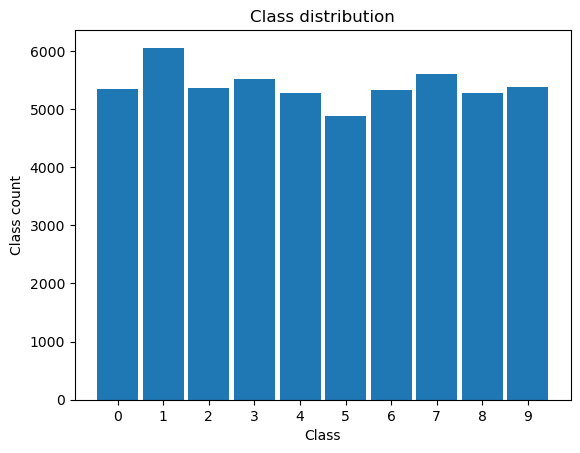

Epoch 1/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.6534 - accuracy: 0.8251 - val_loss: 0.2802 - val_accuracy: 0.9160
Epoch 2/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2277 - accuracy: 0.9336 - val_loss: 0.2107 - val_accuracy: 0.9342
Epoch 3/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1644 - accuracy: 0.9511 - val_loss: 0.2561 - val_accuracy: 0.9197
Epoch 4/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1291 - accuracy: 0.9618 - val_loss: 0.1415 - val_accuracy: 0.9578
Epoch 5/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1034 - accuracy: 0.9694 - val_loss: 0.1181 - val_accuracy: 0.9647
Epoch 6/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0863 - accuracy: 0.9743 - val_loss: 0.1008 - val_accuracy: 0.9700
Epoch 7/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0712 - accuracy: 0.9788 - val_loss: 0.1065 - val_accuracy

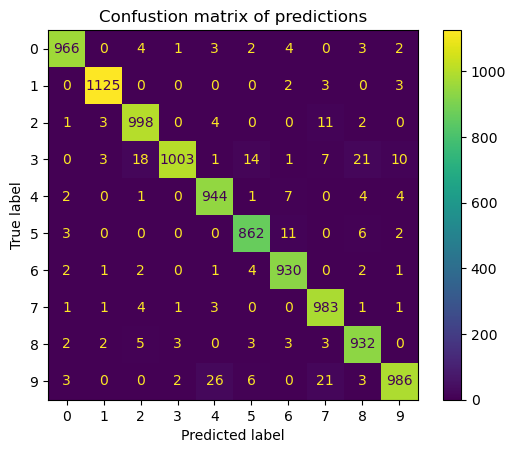

In [36]:
# process the categories and obtain needed variables
num_classes, y_train_new, y_val_new, y_test_new, labels = process_categories(y_train, y_val, y_test)

# initialize model and add layers
model_1 = Sequential()
model_1 = model_layers(model_1, nr_neurons=512, nr_layers=5, activation_type='relu', num_classes=num_classes)

# compile the model
model_1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=["accuracy"])

# train the model
model_1.fit(X_train, y_train_new, batch_size=32, epochs=10, verbose=1, validation_data=(X_val, y_val_new))

evaluate_model(model_1, X_test, y_test_new, labels)

## Excercise 2
*Compare the performance of the following three models:*

### Excercise 2.1
* Neural network without any hidden layers (the input layer connects directly to the output layer).

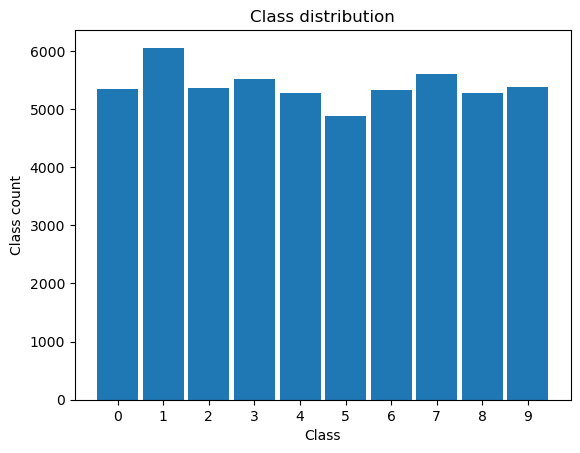

Epoch 1/10
1688/1688 [==============================] - 2s 887us/step - loss: 0.8004 - accuracy: 0.8115 - val_loss: 0.5390 - val_accuracy: 0.8588
Epoch 2/10
1688/1688 [==============================] - 2s 947us/step - loss: 0.4672 - accuracy: 0.8796 - val_loss: 0.4547 - val_accuracy: 0.8767
Epoch 3/10
1688/1688 [==============================] - 1s 809us/step - loss: 0.4111 - accuracy: 0.8901 - val_loss: 0.4194 - val_accuracy: 0.8843
Epoch 4/10
1688/1688 [==============================] - 1s 843us/step - loss: 0.3831 - accuracy: 0.8958 - val_loss: 0.3981 - val_accuracy: 0.8887
Epoch 5/10
1688/1688 [==============================] - 1s 822us/step - loss: 0.3654 - accuracy: 0.8996 - val_loss: 0.3840 - val_accuracy: 0.8915
Epoch 6/10
1688/1688 [==============================] - 1s 829us/step - loss: 0.3529 - accuracy: 0.9031 - val_loss: 0.3734 - val_accuracy: 0.8947
Epoch 7/10
1688/1688 [==============================] - 1s 820us/step - loss: 0.3433 - accuracy: 0.9053 - val_loss: 0.3653 -

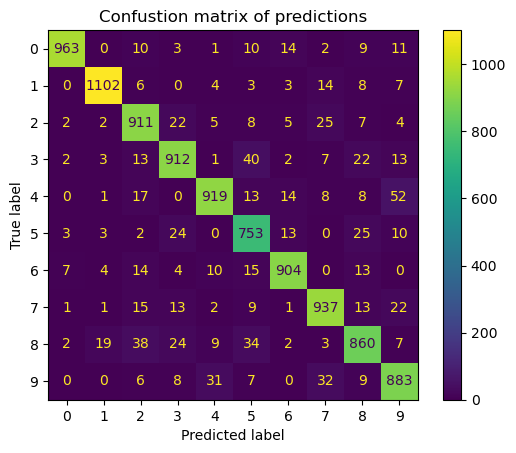

In [37]:
# process the categories and obtain needed variables
num_classes, y_train_new, y_val_new, y_test_new, labels = process_categories(y_train, y_val, y_test)

# initialize model and add layers
model_2_1 = Sequential()
model_2_1 = model_layers(model_2_1, activation_type=None, num_classes=num_classes)

# compile the model
model_2_1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=["accuracy"])

# train the model
model_2_1.fit(X_train, y_train_new, batch_size=32, epochs=10, verbose=1, validation_data=(X_val, y_val_new))

evaluate_model(model_2_1, X_test, y_test_new, labels)

### Excercise 2.2
* Neural network with 3 hidden layers with ReLU activations.

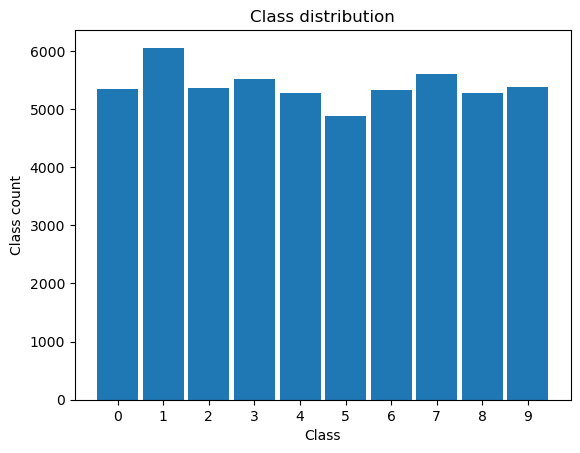

Epoch 1/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.7632 - accuracy: 0.7724 - val_loss: 0.3694 - val_accuracy: 0.8893
Epoch 2/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2968 - accuracy: 0.9145 - val_loss: 0.2781 - val_accuracy: 0.9197
Epoch 3/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2368 - accuracy: 0.9310 - val_loss: 0.2328 - val_accuracy: 0.9315
Epoch 4/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1987 - accuracy: 0.9433 - val_loss: 0.1983 - val_accuracy: 0.9432
Epoch 5/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1722 - accuracy: 0.9501 - val_loss: 0.1779 - val_accuracy: 0.9475
Epoch 6/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1519 - accuracy: 0.9562 - val_loss: 0.1581 - val_accuracy: 0.9522
Epoch 7/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1365 - accuracy: 0.9602 - val_loss: 0.1497 - val_accuracy:

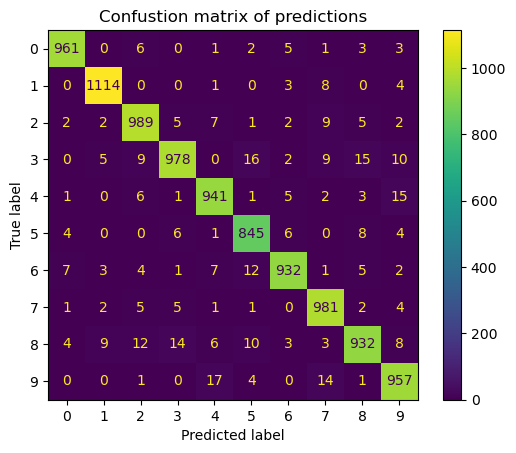

In [38]:
# process the categories and obtain needed variables
num_classes, y_train_new, y_val_new, y_test_new, labels = process_categories(y_train, y_val, y_test)

# initialize model and add layers
model_2_2 = Sequential()
model_2_2 = model_layers(model_2_2, activation_type="relu", num_classes=num_classes)

# compile the model
model_2_2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=["accuracy"])

# train the model
model_2_2.fit(X_train, y_train_new, batch_size=32, epochs=10, verbose=1, validation_data=(X_val, y_val_new))

evaluate_model(model_2_2, X_test, y_test_new, labels)

### Excercise 2.3
* Neural network with 3 hidden layers with linear activations (i.e. without nonlinearities between the layers).

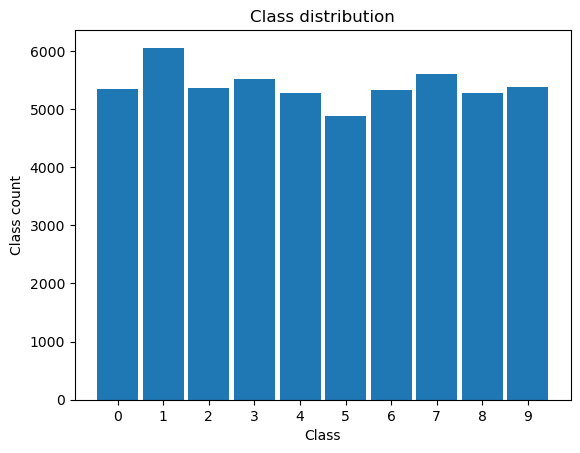

Epoch 1/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5214 - accuracy: 0.8532 - val_loss: 0.3689 - val_accuracy: 0.8925
Epoch 2/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3253 - accuracy: 0.9074 - val_loss: 0.3378 - val_accuracy: 0.9033
Epoch 3/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3036 - accuracy: 0.9139 - val_loss: 0.3225 - val_accuracy: 0.9102
Epoch 4/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2932 - accuracy: 0.9172 - val_loss: 0.3158 - val_accuracy: 0.9102
Epoch 5/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2866 - accuracy: 0.9192 - val_loss: 0.3242 - val_accuracy: 0.9097
Epoch 6/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2816 - accuracy: 0.9215 - val_loss: 0.3100 - val_accuracy: 0.9083
Epoch 7/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2774 - accuracy: 0.9220 - val_loss: 0.3073 - val_accuracy:

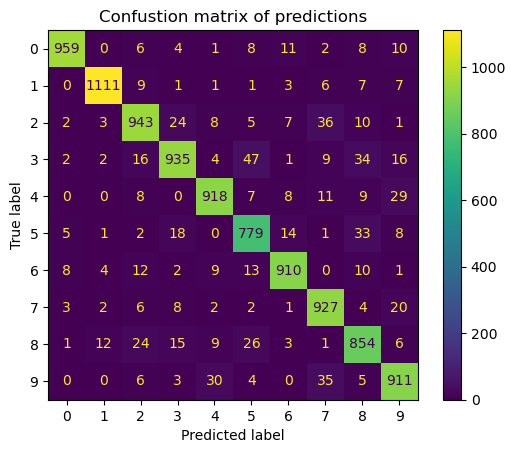

In [39]:
# process the categories and obtain needed variables
num_classes, y_train_new, y_val_new, y_test_new, labels = process_categories(y_train, y_val, y_test)

# initialize model and add layers
model_2_3 = Sequential()
model_2_3 = model_layers(model_2_3, activation_type='linear', num_classes=num_classes)

# compile the model
model_2_3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=["accuracy"])

# train the model
model_2_3.fit(X_train, y_train_new, batch_size=32, epochs=10, verbose=1, validation_data=(X_val, y_val_new))

evaluate_model(model_2_3, X_test, y_test_new, labels)

## Excercise 3
*Train a neural network model (the specific architecture is up to you) for a four class classification problem derived from MNIST in the following way:*

- "vertical digits": 1, 7
- "loopy digits": 0, 6, 8, 9
- "curly digits": 2, 5
- "other": 3, 4

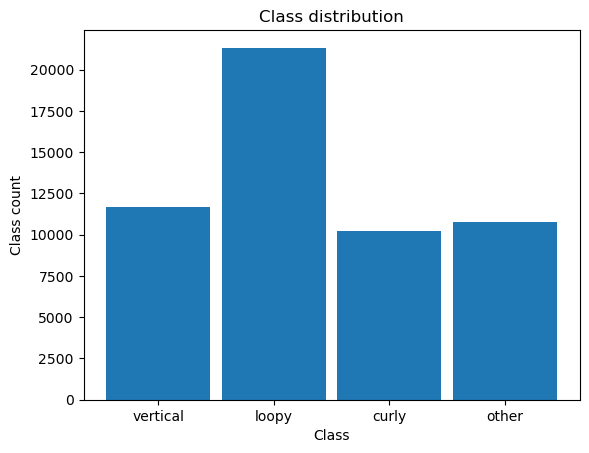

Epoch 1/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5353 - accuracy: 0.8027 - val_loss: 0.3329 - val_accuracy: 0.8892
Epoch 2/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2459 - accuracy: 0.9207 - val_loss: 0.2284 - val_accuracy: 0.9292
Epoch 3/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1813 - accuracy: 0.9427 - val_loss: 0.1939 - val_accuracy: 0.9373
Epoch 4/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1491 - accuracy: 0.9532 - val_loss: 0.1619 - val_accuracy: 0.9495
Epoch 5/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1288 - accuracy: 0.9596 - val_loss: 0.1483 - val_accuracy: 0.9533
Epoch 6/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1133 - accuracy: 0.9643 - val_loss: 0.1394 - val_accuracy: 0.9560
Epoch 7/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1016 - accuracy: 0.9684 - val_loss: 0.1419 - val_accuracy:

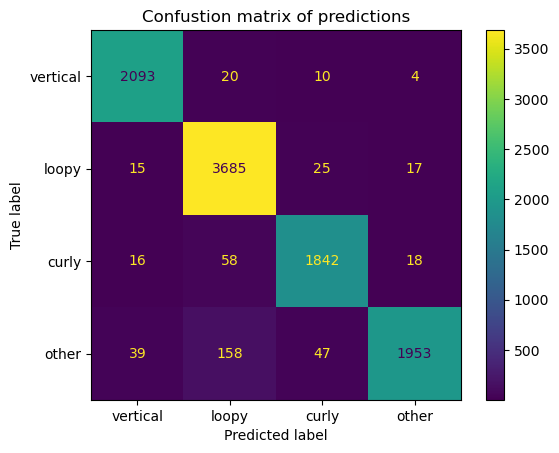

In [40]:
# process the categories and obtain needed variables
num_classes, y_train_new, y_val_new, y_test_new, labels = process_categories(y_train, y_val, y_test, group_classes=True)

# initialize model and add layers
model_3 = Sequential()
model_3 = model_layers(model_3, activation_type='relu', num_classes=num_classes)

# compile the model
model_3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=["accuracy"])

# train the model
model_3.fit(X_train, y_train_new, batch_size=32, epochs=10, verbose=1, validation_data=(X_val, y_val_new))

evaluate_model(model_3, X_test, y_test_new, labels)